# Generadores Congruenciales Lineales

Los **Generadores Congruenciales Lineales** (GCL) son una familia de algoritmos para generar secuencias de números pseudoaleatorias. Se basan en una relación de recurrencia simple. 

## Definición

Los GCL se basan en una combinación lineal de los últimos $k$ enteros generados y se calcula su resto al dividir por un entero fijo $m$. En el método congruencial simple (de orden $k = 1$), partiendo de una semilla inicial $X_0$, el algoritmo se basa en la siguiente recurrencia matemática:

$$X_{n+1} = (aX_n + c) \bmod m$$

donde:
- $X_n$: es el valor actual de la secuencia
- $a$: es el multiplicador
- $c$: es el incremento 
- $m$: es el módulo
- $X_{n+1}$: siguiente número pseudoaleatorio de la secuencia

## Tipos de Generadores
- Si $c = 0$: *congruencial multiplicativo* (o *congruencial de Lehmer*)
- Si $c \neq 0$: *congruencial mixto*

## Normalización

Para obtener valores en el intervalo $[0,1]$, se calcula:

$$U_n = \frac{X_n}{m}$$

## Ventajas
- *Simplicidad*: Fáciles de implementar y entender
- Con la misma configuración de parámetros ($a,c,m$), misma semilla produce misma secuencia

## Desventajas
- *Período limitado*: $\text{Máximo período} = m$
- *Parámetros críticos*: Requieren parámetros cuidadosamente elegidos 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from typing import List, Tuple
import seaborn as sns 

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Implementación Básica del Generador Congruencial Lineal

In [2]:
class LinearCongruentialGenerator:
  """Implementación de un Generador Congruencial Lineal (GCL). 
  
  Con fórmula base: $X_{n+1} = (a * X_n + c) mod m$
  
  Parámetros:
  -----------
  a : int 
      Multiplicador (debe ser mayor que 0)
  c : int 
      Incremento (si c=0, es un generador multiplicativo)
  m : int 
      Módulo (entero positivo)
  seed : int 
      Semilla inicial X_0
  """
  
  def __init__(self, a:int, c:int, m:int, seed:int) -> None:
    self.a = a            # multiplicador
    self.c = c            # incremento
    self.m = m            # módulo
    self.seed = seed      # semilla inicial
    self.current = seed   # valor actual de la secuencia
    self.sequence = [ ]   # almacena la secuencia generada
    
    if a <= 0 or m <= 0:
      raise ValueError("Los parámetros 'a' y 'm' deben ser positivos")
    if c < 0:
      raise ValueError("El parámetro 'c' debe ser no negativo")
    if seed < 0 or seed >= m:
      raise ValueError("La semilla debe estar en el rango [0, m-1]")
  
  def _next(self) -> int:
    """Genera el siguiente número en la secuencia

    Returns:
      int: el siguiente número pseudoaleatorio
    """
    # aplicar la fórmula del GCL 
    self.current = (self.a * self.current + self.c) % self.m 
    self.sequence.append(self.current)
    return self.current
  
  def generate_sequence(self, n:int) -> List[int]:
    """Genera una secuencia de n números pseudoaleatorios. 

    Args:
      n (int): número de elementos a generar 

    Returns:
      List[int]: lista con los n números generados
    """
    sequence = [ ]
    for _ in range(n):
      sequence.append(self._next())
    return sequence
  
  def generate_uniforms(self, n:int) -> List[float]:
    """Genera una secuencia de n números uniformes en [0,1] usando: U_n = X_n / m

    Args:
      n (int): número de elementos a generar

    Returns:
      List[float]: lista con los n números uniformes
    """
    sequence = self.generate_sequence(n)
    return [ x / self.m for x in sequence ]
  
  def reset(self):
    "Reinicia el generador con la semilla originial"
    self.current = self.seed 
    self.sequence = [ ]
  
  def __str__(self) -> str:
    return f"Generador Congruencial Lineal\nParámetros: a={self.a}, c={self.c}, m={self.m}\nSemilla: {self.seed}\nFórmula: X_{{n+1}} = ({self.a} * X_n + {self.c}) mod {self.m}" 
  
  def __repr__(self) -> str:
    return self.__str__()

## Ejemplo 1: Generador Congruencial Mixto

In [3]:
# parámetros para un generador mixto
a = 1664525
c = 1013904223
m = 2**32
seed = 12345

lcg1 = LinearCongruentialGenerator(a, c, m, seed)
print(lcg1)

N = 10

print(f"\nPrimeros {N} valores de la secuencia")
sequence = lcg1.generate_sequence(N)
for i, x_i in enumerate(sequence):
  print(f"X_{i+1} = {x_i}")

lcg1.reset()
print(f"\nPrimeros {N} valores uniformes de la secuencia")
sequence = lcg1.generate_uniforms(N)
for i, x_i in enumerate(sequence):
  print(f"X_{i+1} = {x_i}")

Generador Congruencial Lineal
Parámetros: a=1664525, c=1013904223, m=4294967296
Semilla: 12345
Fórmula: X_{n+1} = (1664525 * X_n + 1013904223) mod 4294967296

Primeros 10 valores de la secuencia
X_1 = 87628868
X_2 = 71072467
X_3 = 2332836374
X_4 = 2726892157
X_5 = 3908547000
X_6 = 483019191
X_7 = 2129828778
X_8 = 2355140353
X_9 = 2560230508
X_10 = 3364893915

Primeros 10 valores uniformes de la secuencia
X_1 = 0.02040268573909998
X_2 = 0.01654784823767841
X_3 = 0.5431557944975793
X_4 = 0.6349040560889989
X_5 = 0.9100295137614012
X_6 = 0.11246166913770139
X_7 = 0.4958894052542746
X_8 = 0.5483488442841917
X_9 = 0.5961001170799136
X_10 = 0.7834504160564393


## Ejemplo 2: Generador Congruencial Multiplicativo (Lehmer)

In [4]:
# parámetros para un generador multiplicativo (Lehmer)
a = 16807
c = 0
m = 2**31 - 1
seed = 12345

lcg2 = LinearCongruentialGenerator(a, c, m, seed)
print(lcg2)

print(f"\nPrimeros {N} valores de la secuencia")
sequence = lcg2.generate_sequence(N)
for i, x_i in enumerate(sequence):
  print(f"X_{i+1} = {x_i}")

lcg2.reset()
print(f"\nPrimeros {N} valores uniformes de la secuencia")
sequence = lcg2.generate_uniforms(N)
for i, x_i in enumerate(sequence):
  print(f"X_{i+1} = {x_i}")

Generador Congruencial Lineal
Parámetros: a=16807, c=0, m=2147483647
Semilla: 12345
Fórmula: X_{n+1} = (16807 * X_n + 0) mod 2147483647

Primeros 10 valores de la secuencia
X_1 = 207482415
X_2 = 1790989824
X_3 = 2035175616
X_4 = 77048696
X_5 = 24794531
X_6 = 109854999
X_7 = 1644515420
X_8 = 1256127050
X_9 = 1963079340
X_10 = 1683198519

Primeros 10 valores uniformes de la secuencia
X_1 = 0.09661652850760917
X_2 = 0.8339946273872604
X_3 = 0.9477024976851895
X_4 = 0.035878594981449935
X_5 = 0.011545853229028104
X_6 = 0.051155220275351417
X_7 = 0.7657871678312249
X_8 = 0.5849297393974521
X_9 = 0.9141300529773021
X_10 = 0.7838003895170057


## Estadísticas 

### Media 

La media teórica de un generador congruencial que produce números pseudoaleatorios uniformemente distribuidos en el intervalo es:

$$\mu = \frac{a + b}{2} = \frac{0 + 1}{2} = 0.5$$

donde $a = 0$ y $b = 1$ son los límites inferior y superior del intervalo. Esta media de 0.5 representa el punto central del intervalo y es el valor esperado teórico para cualquier secuencia de números pseudoaleatorios uniformemente distribuidos.

### Varianza

La varianza teórica para la distribución uniforme continua $U(0,1)$ se calcula mediante la fórmula:

$$\sigma^2 = \frac{(b-a)^2}{12} = \frac{(1 - 0)^2}{12} = \frac{1}{12} \approx 0.0833$$ 

Esta fórmula se deriva de las propiedades fundamentales de la distribución uniforme y representa la medida de dispersión alrededor de la media. La varianza indica qué tan dispersos están los valores generados respecto al valor central de 0.5. 

### Desviación Estándar

La desviación estándar es la raíz cuadrada de la varianza: 

$$\sigma = \sqrt{ \frac{(b-a)^2}{12} } = \frac{ b-a }{ \sqrt{12} } = \frac{1 - 0}{ \sqrt{12} } \approx 0.2887$$

Esta estadística proporciona una medida de la dispersión en las mismas unidades que los datos originales.

In [5]:
# generar números uniformes en [0,1] con ambos generadores
N = 1000 

# reiniciar generadores
lcg1.reset()  # mixto
lcg2.reset()  # lehmer

# generar secuencias uniformes
sequence1 = lcg1.generate_uniforms(N)
sequence2 = lcg2.generate_uniforms(N)

print(f"""=== Estadísticas de Generador Mixto (N={N}) ===
Media: {np.mean(sequence1)} (teórico: 0.5)
Varianza: {np.var(sequence1)} (teórico: 0.0833)
Desviación Estándar: {np.std(sequence1)} (teórico: 0.2887)
Mínimo: {np.min(sequence1)} 
Máximo: {np.max(sequence1)}
""")

print(f"""=== Estadísticas de Generador Lehmer (N={N}) ===
Media: {np.mean(sequence2)} (teórico: 0.5)
Varianza: {np.var(sequence2)} (teórico: 0.0833)
Desviación Estándar: {np.std(sequence2)} (teórico: 0.2887)
Mínimo: {np.min(sequence2)}
Máximo: {np.max(sequence2)}
""")

=== Estadísticas de Generador Mixto (N=1000) ===
Media: 0.5072595152379945 (teórico: 0.5)
Varianza: 0.08173803197303794 (teórico: 0.0833)
Desviación Estándar: 0.28589863933400933 (teórico: 0.2887)
Mínimo: 0.00012929551303386688 
Máximo: 0.9999259654432535

=== Estadísticas de Generador Lehmer (N=1000) ===
Media: 0.4912281235294548 (teórico: 0.5)
Varianza: 0.08206808420920461 (teórico: 0.0833)
Desviación Estándar: 0.2864752767852832 (teórico: 0.2887)
Mínimo: 4.2433384825677324e-05
Máximo: 0.9968053325995828



## Visualización de las Secuencias 

Visualizar las propiedades de los generadores

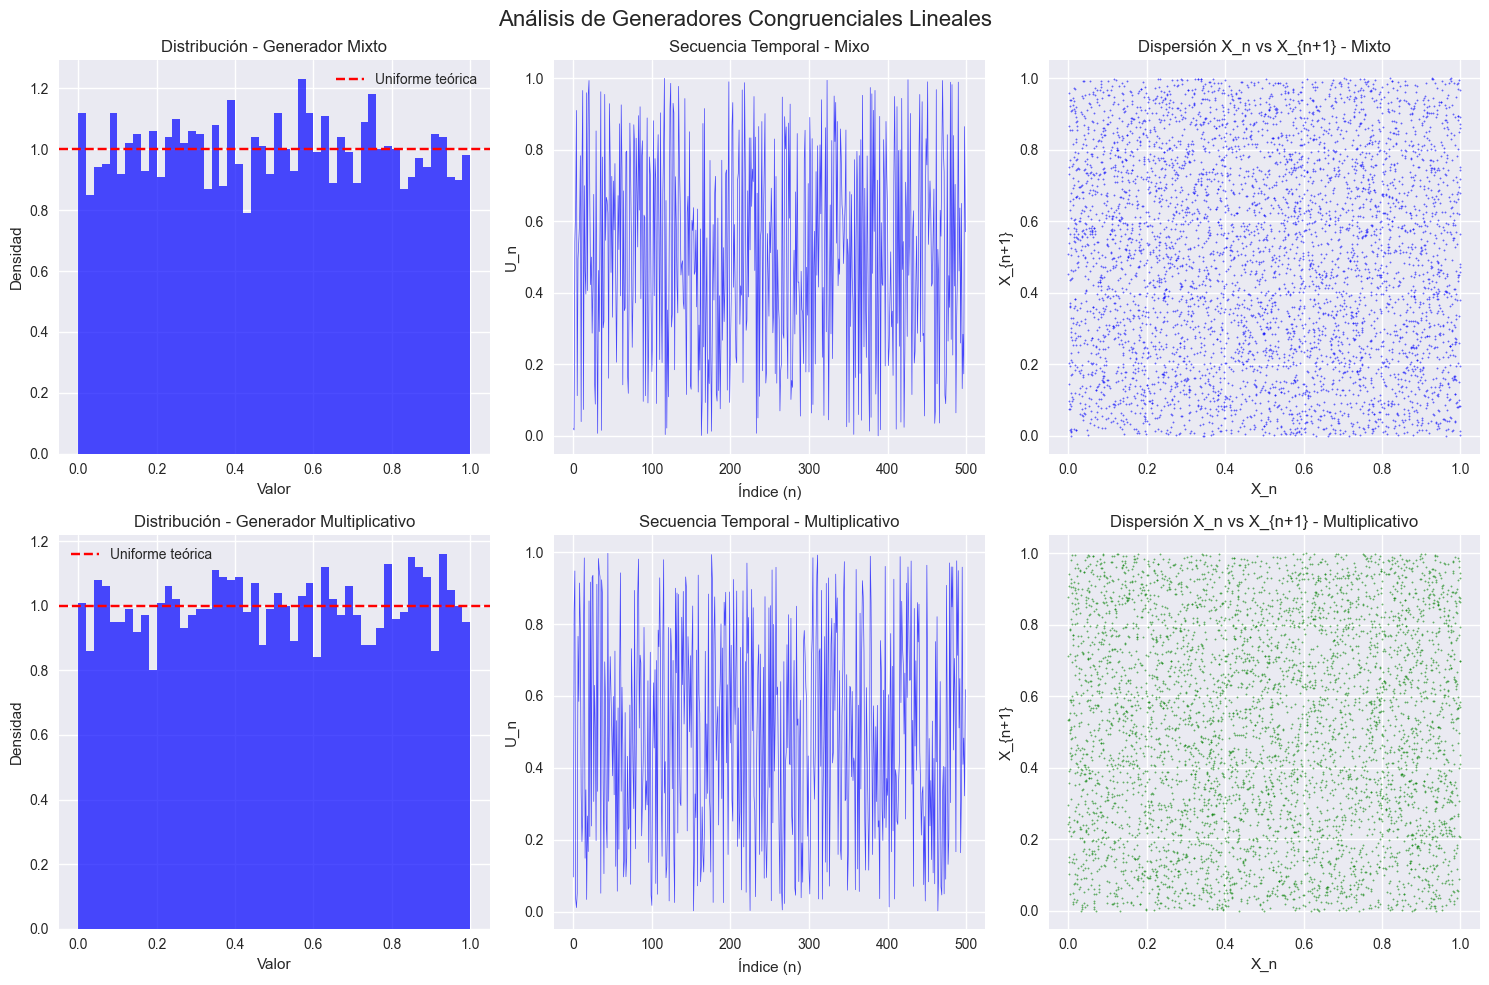

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle("Análisis de Generadores Congruenciales Lineales", fontsize=16)

# generación de muestras para la visualización
samples = 5000 
lcg1.reset()
lcg2.reset()
sequence1 = lcg1.generate_uniforms(samples)
sequence2 = lcg2.generate_uniforms(samples)

# 1. Histogramas de distribución
axes[0, 0].hist(sequence1, bins=50, alpha=0.7, color='blue', density=True)
axes[0, 0].axhline(y=1, color='red', linestyle='--', label='Uniforme teórica')
axes[0, 0].set_title('Distribución - Generador Mixto')
axes[0, 0].set_xlabel('Valor')
axes[0, 0].set_ylabel('Densidad')
axes[0, 0].legend()

axes[1, 0].hist(sequence2, bins=50, alpha=0.7, color='blue', density=True)
axes[1, 0].axhline(y=1, color='red', linestyle='--', label='Uniforme teórica')
axes[1, 0].set_title('Distribución - Generador Multiplicativo')
axes[1, 0].set_xlabel('Valor')
axes[1, 0].set_ylabel('Densidad')
axes[1, 0].legend()

# 2. Gráfico de secuencia temporal
index = np.arange(500) # primeros 500 valores
axes[0, 1].plot(index, sequence1[:500], 'b-', alpha=0.7, linewidth=0.5)
axes[0, 1].set_title('Secuencia Temporal - Mixo')
axes[0, 1].set_xlabel('Índice (n)')
axes[0, 1].set_ylabel('U_n')

index = np.arange(500) # primeros 500 valores
axes[1, 1].plot(index, sequence2[:500], 'b-', alpha=0.7, linewidth=0.5)
axes[1, 1].set_title('Secuencia Temporal - Multiplicativo')
axes[1, 1].set_xlabel('Índice (n)')
axes[1, 1].set_ylabel('U_n')

# 3. Gráfico de dispersión (X_n vs. X_{n+1})
axes[0, 2].scatter(sequence1[:-1], sequence1[1:], s=1, alpha=0.5, color='blue')
axes[0, 2].set_title('Dispersión X_n vs X_{n+1} - Mixto')
axes[0, 2].set_xlabel('X_n')
axes[0, 2].set_ylabel('X_{n+1}')

axes[1, 2].scatter(sequence2[:-1], sequence2[1:], s=1, alpha=0.5, color='green')
axes[1, 2].set_title('Dispersión X_n vs X_{n+1} - Multiplicativo')
axes[1, 2].set_xlabel('X_n')
axes[1, 2].set_ylabel('X_{n+1}')

plt.tight_layout()
plt.show()

## Período y Calidad del Generador

Una característica crucial de los GCL en su período (cuántos números se generan antes de repetir la secuencia)

In [7]:
def find_period(lcg: LinearCongruentialGenerator, max_iter:int=10000) -> int:
  "Encuentra el período de un generador congruencial lineal"
  lcg.reset()
  results = set()

  for i in range(max_iter):
    x_i = lcg._next()
    if x_i in results:
      return i
    results.add(x_i) 
  
  return -1 

# ejemplo con un generador pequeño
a = 5 
c = 1
m = 16
seed = 1
lcg = LinearCongruentialGenerator(a=a, c=c, m=m, seed=seed)
print(lcg)

period = find_period(lcg=lcg, max_iter=100)
print(f"Período encontrado: {period} (período máximo teórico: {m})")

Generador Congruencial Lineal
Parámetros: a=5, c=1, m=16
Semilla: 1
Fórmula: X_{n+1} = (5 * X_n + 1) mod 16
Período encontrado: 16 (período máximo teórico: 16)


## Comparación con Generador de Python

Comparación de Generadores
          LCG Mixto        Random         NumPy
count  10000.000000  10000.000000  10000.000000
mean       0.498770      0.500251      0.494160
std        0.288132      0.287694      0.287630
min        0.000059      0.000036      0.000012
25%        0.245337      0.252361      0.246329
50%        0.504596      0.500643      0.492529
75%        0.745627      0.746025      0.740006
max        0.999926      0.999908      0.999718


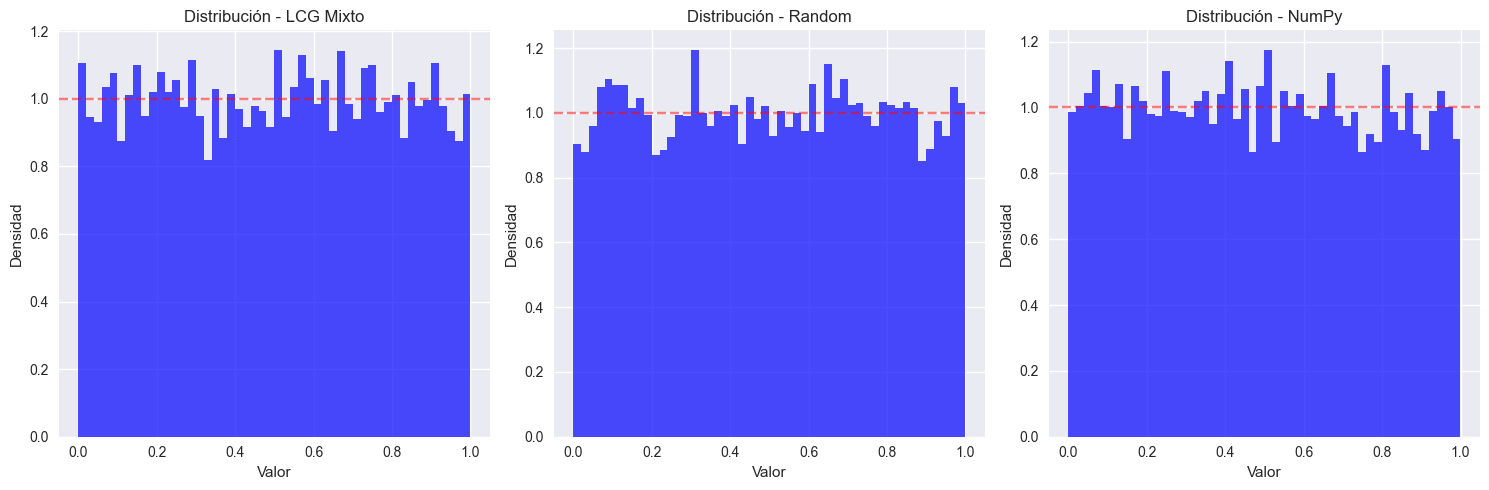

In [8]:
import random 

# configuración de semillas 
random.seed(42)
np.random.seed(42)

# generación de muestras
samples = 10000
lcg1.reset()
samples_lcg = lcg1.generate_uniforms(samples)
samples_random = [random.random() for _ in range(samples)]
samples_numpy = np.random.random(samples)

# creación de DataFrame para comparación
df = pd.DataFrame(
  {
    'LCG Mixto': samples_lcg,
    'Random': samples_random,
    'NumPy' : samples_numpy
  }
)

print("Comparación de Generadores")
print(df.describe())

# visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (name, data) in enumerate(df.items()):
  axes[i].hist(data, bins=50, color="blue", alpha=0.7, density=True)
  axes[i].set_title(f"Distribución - {name}")
  axes[i].set_xlabel("Valor")
  axes[i].set_ylabel("Densidad")
  axes[i].axhline(y=1, color="red", linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Pruebas de Aleatoriedad

Implementación de pruebas básicas para evaluar la calidad de las muestras generadas



### Prueba Chi-Cuadrado para Uniformidad

La prueba chi-cuadrado permite evaluar si una secuencia de números generados por un generador de números pseudoaleatorios se distribuye de manera uniforme en un intervalo, típicamente $(0,1)$. Esta uniformidad es una de las propiedades que deben cumplir un buen generador de números pseudoaleatorios, ya que garantiza que todos los valores posibles tengan la misma probabilidad de aparecer. 

El procedimiento general es el siguiente:
1. **Formulación de hipótesis**: 
   1. *Hipótesis nula* ($H_0$): los números generados ($r_i$) siguen una distribución uniforme en el intervalo $(0,1)$
   2. *Hipótesis alternativa* ($H_1$): los números generados no siguen una distribución uniforme.
2. **División del intervalo**: Se divide el intervalo $(0,1)$ en $m$ subintervalos de igual tamaño. Una recomendación común es elegir $m \approx \sqrt{n}$, donde $n$ es la cantidad de números generados
3. **Cálculo de frecuencias**: 
   1. *Frecuencia observada* ($O_i$): número de valores que caen en cada subintervalo
   2. *Frecuencia esperada* ($E_i$): teóricamente, si los números son uniformes, debería haber aproximadamente $E_i = n/m$ números en cada subintervalo 
4. **Cálculo del estadístico chi-cuadrado**: Este estadístico mide la discrepancia entre lo observado y lo esperado bajo la hipótesis de uniformidad.

$$X^2 = \sum_{i=1}^m \frac{ (O_i - E_i)^2 }{E_i} $$

1. **Comparación con el valor crítico**: 
   1. Se compara el valor calculado de $X^2$ con el valor crítico de la distribución chi-cuadrado con $m - 1$ grados de libertad y un nivel de significancia $\alpha$ (por ejemplo, 0.05)
   2. Si $X^2$ es menor que el valor crítico, no se rechaza la hipótesis nula y se concluye que los números pueden considerarse uniformes (y, por tanto, aleatorios en ese aspecto). 
   3. Si $X^2$ es mayor, se rechaza la hipótesis de uniformidad. 


### Prueba de Runs (Rachas) para Independencia

La prueba de runs o prueba de rachas permite evaluar la independencia de una secuencia de números generados por un generador de números pseudoaleatorios. Su objetivo es detectar patrones o dependencias entre los números, los que sería indicativo de que el generador no es verdaderamente aleatorio. 

**Definición de run**: Una *run* es una secuencia ininterrumpida de valores que cumplen una misma condición, por ejemplo, una serie de números mayores o menores que la mediana, o una secuencia de ceros y unos asignados según un criterio. 

Procedimiento básico:
1. Se toma la secuencia de números $r_i$ y se transforma en una secuencia de símbolos (por ejemplo, 1 si el número es mayor que la mediana, 0 si es menor o igual). 
2. Se cuenta el número total de runs (cambios de símbolos en la secuencia).
3. Se calcula el valor esperado y la varianza del número de runs bajo la hipótesis de independencia. 
4. Se utiliza un estadístico de prueba (normalmente basado en la distribución normal) para comparar el número observado de runs con el valor esperado. 
5. Si el número de runs observado difiere significativamente del valor esperado, se rechaza la hipótesis de independencia; si no, no se puede rechazar que la secuencia sea independiente. 

¿Cómo se interpreta esto?
- Un número de runs muy bajo indica que hay demasiada agrupación (dependencia)
- Un número de runs muy alto sugiere alternancia excesiva (también señal de dependencia)
- Un número de runs cercano al valor esperado indica independencia entre los valores. 

In [9]:
def chi_square_test(data:List[float], n_intervals:int=10) -> float:
  "Prueba de Chi-Cuadrado para uniformidad"
  n = len(data)
  expected = n / n_intervals 
  
  frequencies = [0] * n_intervals
  for value in data:
    if value >= 1.0:
      value = 0.999999
    intervals = int(value * n_intervals)
    frequencies[intervals] += 1
  
  chi2 = sum((r - expected)**2 / expected for r in frequencies)
  return chi2

def runs_test(data:List[float], threshold:float=0.5) -> int:
  "Prueba de runs (rachas) para independencia"
  binary = [1 if x >= threshold else 0 for x in data ]
  runs = 1
  for i in range(1, len(binary)):
    if binary[i] != binary[i-1]:
      runs += 1
  return runs

print(f"=== Pruebas de Aleatoriedad (tamaño de muestra: {samples}) ===")

# prueba chi-cuadrado
chi2_lcg = chi_square_test(samples_lcg)
chi2_random = chi_square_test(samples_random)

print(f"""\n=== Prueba Chi-Cuadrado ===
Generador Congruencial Lineal (Mixto): {chi2_lcg}
Python Random: {chi2_random}
""")

runs_lcg = runs_test(samples_lcg)
runs_random = runs_test(samples_random)

print(f"""=== Prueba de Runs ===
Generador Congruencial Lineal (Mixto): {runs_lcg}
Python Random: {runs_random} 
""")

=== Pruebas de Aleatoriedad (tamaño de muestra: 10000) ===

=== Prueba Chi-Cuadrado ===
Generador Congruencial Lineal (Mixto): 14.16
Python Random: 13.655999999999999

=== Prueba de Runs ===
Generador Congruencial Lineal (Mixto): 5120
Python Random: 5060 



Los resultados obtenidos para una configuración de: 
- Generador Congruencial Mixto
  - $a = 1664525$
  - $c = 1013904223$
  - $m = 2^32$
  - $seed = 12345$
- Generador que trae Python (Python Random)
  - $seed = 42$

con tamaño de muestra de 10 000 son: 
- Prueba Chi-Cuadrado: 
  - Generador Congruencial Lineal (Mixto): 14.16
  - Python Random: 13.6559999999
- Prueba de Runs:
  - Generador Congruencial Lineal (Mixto): 5120
  - Python Random: 5060

Esto significa que:
- Prueba Chi-Cuadrado: Ambos generadores pasan la prueba (valor crítico $\approx$ 16.92 y 9 grados de libertad).
- Runs: La cantidad de rachas ($\sim$ 5000) es consistente con la independencia de valores consecutivos. 

## Aplicación del Generador Congruencial Lineal

Se usará este tipo de generador para simular la distribución exponencial 

In [10]:
def generate_exponential(lcg: LinearCongruentialGenerator, n:int, _lambda:float) -> List[float]:
  "Genera números con distribución exponencial"
  lcg.reset()
  exponential = []
  
  for _ in range(n):
    u = lcg.generate_uniforms(1) 
    while u == 0: # evitar u = 0 para evitar log(0)
      u = lcg.generate_uniforms(1)
    
    # transformación inversa: X = -ln(U) / lambda
    x = -np.log(u) / _lambda
    exponential.append(x)
  
  return exponential

n_samples = 5000 
exponential = generate_exponential(lcg1, n_samples, _lambda=2.0)
print(f"""=== Distribución Exponencial (lambda=2) ===
Media: {np.mean(exponential)} (teórica: {1/2.0}) 
Desviación Estándar: {np.std(exponential)} (teórica: {1/2.0}) 
""")

=== Distribución Exponencial (lambda=2) ===
Media: 0.5010489382174196 (teórica: 0.5) 
Desviación Estándar: 0.5022938714083077 (teórica: 0.5) 

